In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')

In [3]:
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Data Cleaning

In [5]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

The sum of NA values in horsepower is: 6
The median is: 93.5



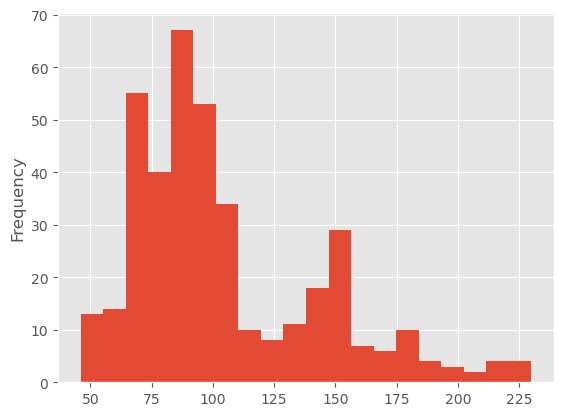

In [7]:
# Horsepower

a = df['horsepower'].isnull().sum()
print(f'The sum of NA values in horsepower is: {a}')
df['horsepower'].plot(kind = 'hist',bins = 20)
median = df['horsepower'].median()
print(f'The median is: {median}')
print("")
plt.show()


In [8]:
df['horsepower'].fillna(93.5,inplace = True)
df['horsepower'].isnull().sum()

0

In [9]:
# Year
df['model_year'] = df['model_year'].apply(lambda x: x + 1900)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,1982,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,1982,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,1982,usa,ford ranger


In [10]:
df.drop_duplicates()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,1982,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,1982,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,1982,usa,ford ranger


In [11]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,1976.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,1973.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,1976.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,1979.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000


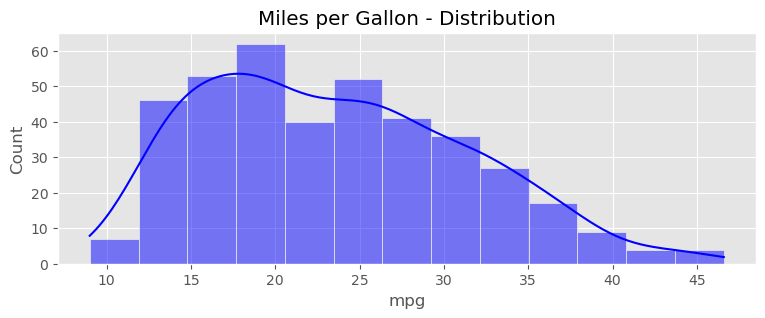

In [12]:
# mpg

plt.figure(figsize = (9,3))
sns.histplot(df['mpg'],kde = True,color = 'blue',line_kws={'color': 'black', 'lw': 1.5})
plt.title('Miles per Gallon - Distribution')
plt.show()

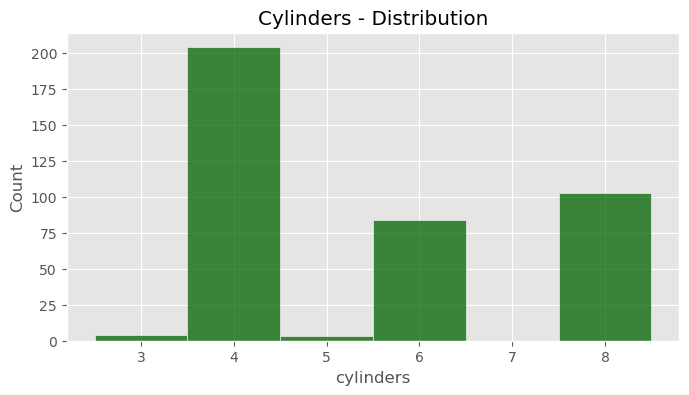

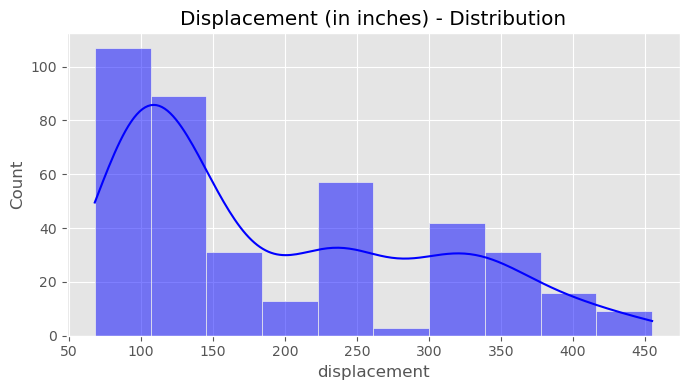

In [13]:
plt.figure(figsize = (7.9,4))
sns.histplot(df['cylinders'],discrete = True,color = 'darkgreen')
plt.title('Cylinders - Distribution')
plt.show()
print("")
plt.figure(figsize = (7,4))
sns.histplot(df['displacement'],kde = True,color = 'blue',line_kws={'color': 'black', 'lw': 1.5})
plt.title('Displacement (in inches) - Distribution')
plt.tight_layout()
plt.show()

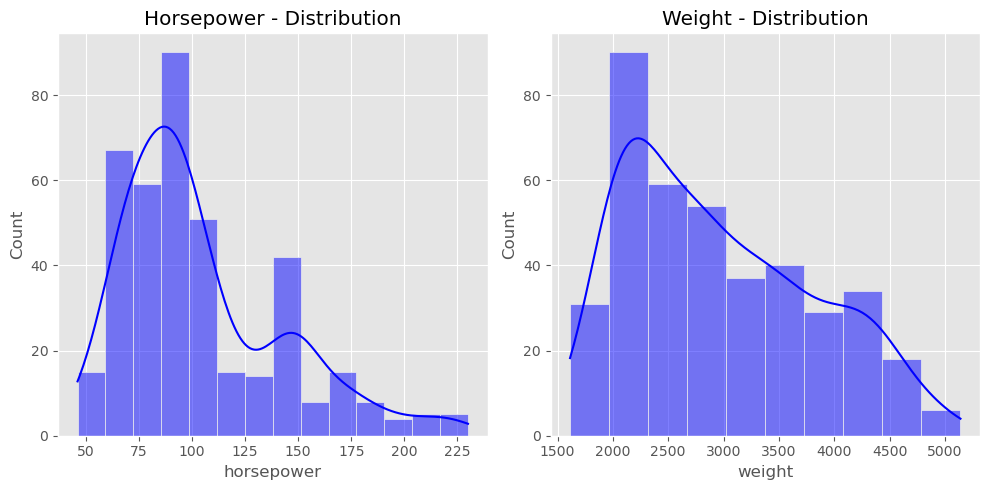

In [14]:
# Horsepower & Weight Distributions

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(df['horsepower'],kde = True,color = 'blue',line_kws={'color': 'black', 'lw': 1.5})
plt.title('Horsepower - Distribution')

plt.subplot(1,2,2)
sns.histplot(df['weight'],kde = True,color = 'blue',line_kws={'color': 'black', 'lw': 1.5})
plt.title('Weight - Distribution')
plt.tight_layout()
plt.show()

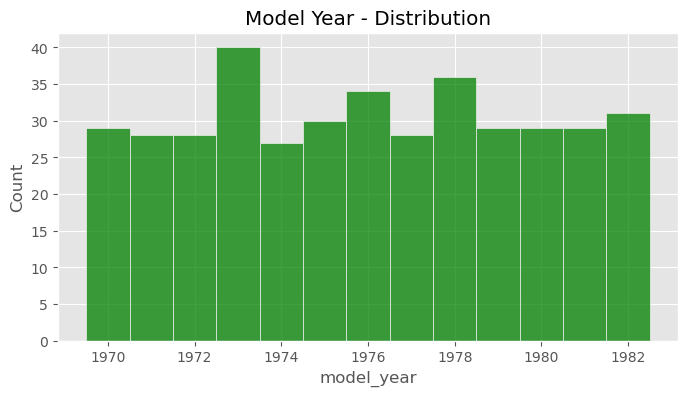

In [15]:
# model_year

plt.figure(figsize = (8,4))
sns.histplot(df['model_year'],discrete = True,color = 'green')
plt.title('Model Year - Distribution')
plt.show()


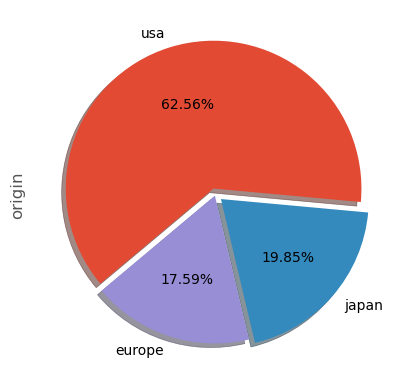

In [16]:
# Origin

expand2 = [0.04,0.05,0.01]
labels = ['usa','japan','europe']
df['origin'].value_counts().plot.pie(labels = labels,autopct = '%.2f%%',shadow = True,explode = expand2,
                                    counterclock = False,startangle =220)
plt.show()

In [17]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_10948\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_10948\2278256143.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')


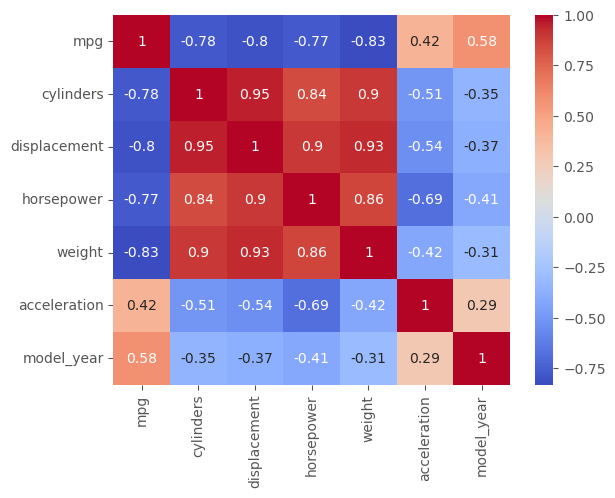

In [18]:
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')
plt.show()

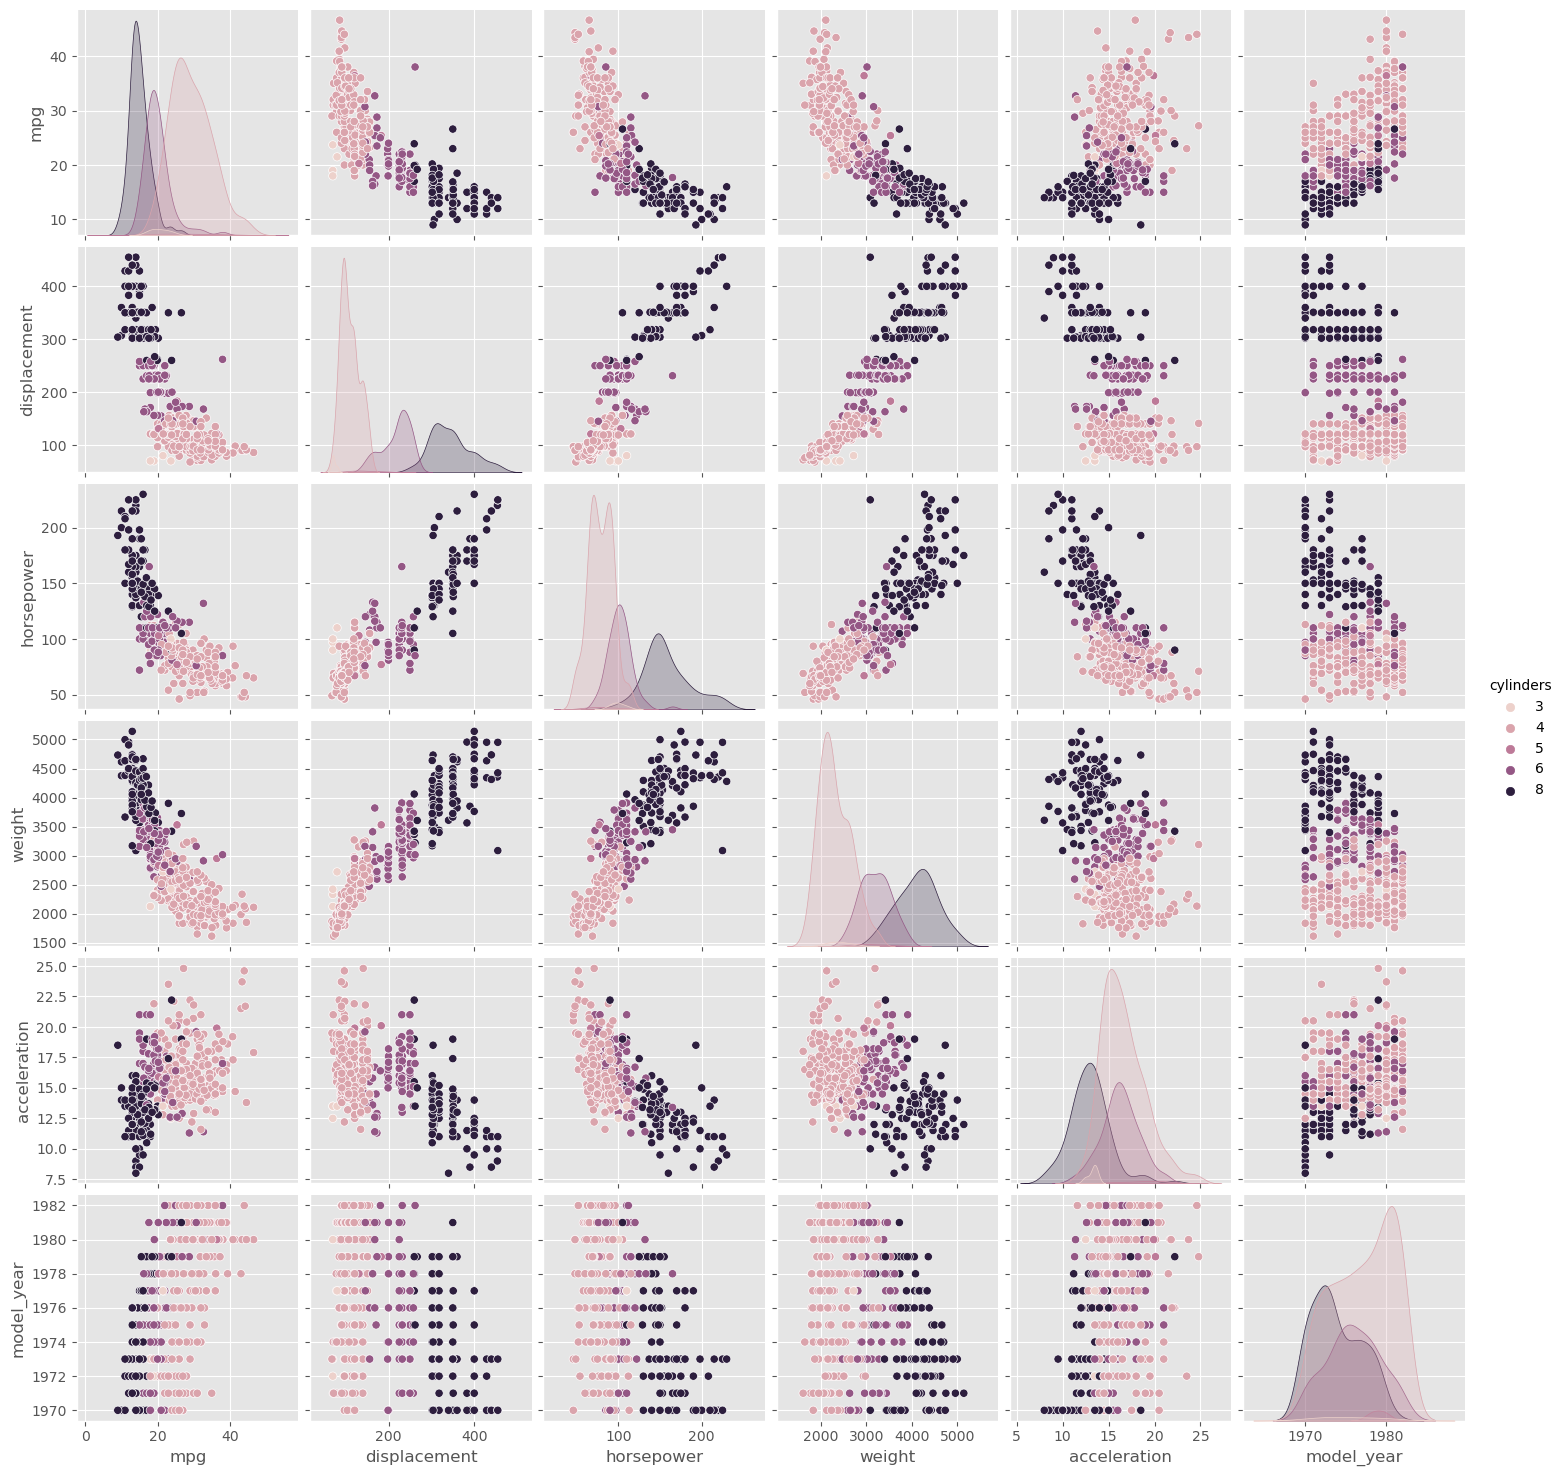

In [19]:
sns.pairplot(df.select_dtypes(['number']),hue = 'cylinders')
plt.show()

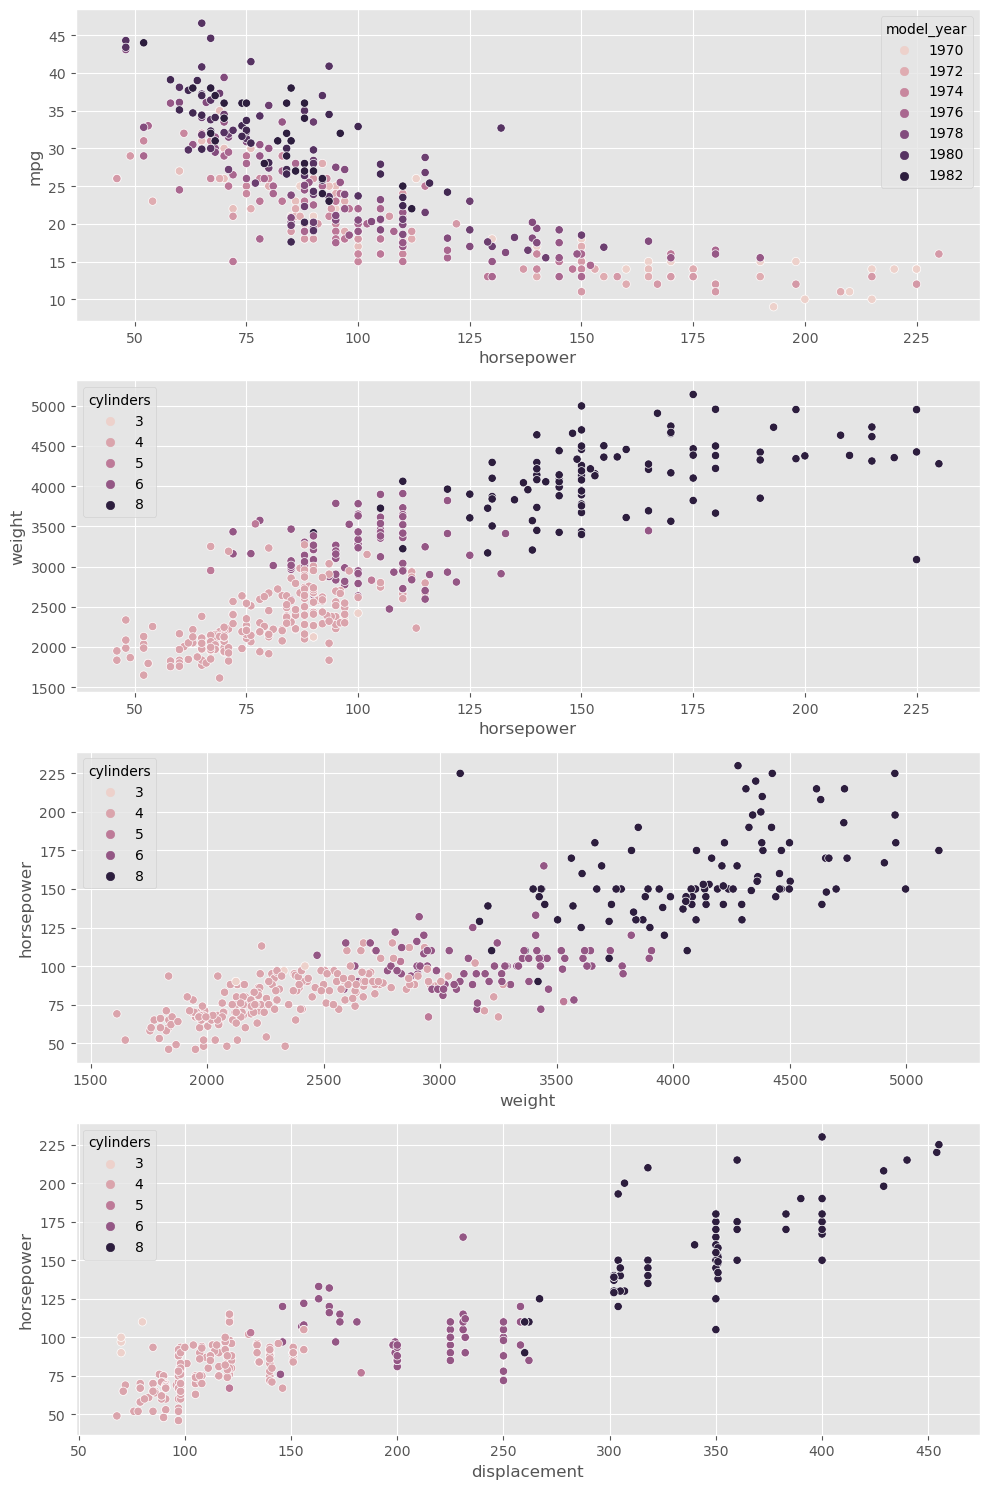

In [20]:
plt.figure(figsize = (10,15))
plt.subplot(4,1,1)
sns.scatterplot(x = df['horsepower'],y = df['mpg'],hue = df['model_year'])
plt.subplot(4,1,2)
sns.scatterplot(x = df['horsepower'],y = df['weight'],hue = df['cylinders'])
plt.subplot(4,1,3)
sns.scatterplot(x = df['weight'],y = df['horsepower'],hue = df['cylinders'])
plt.subplot(4,1,4)
sns.scatterplot(x = df['displacement'],y = df['horsepower'],hue = df['cylinders'])
plt.tight_layout()
plt.show()

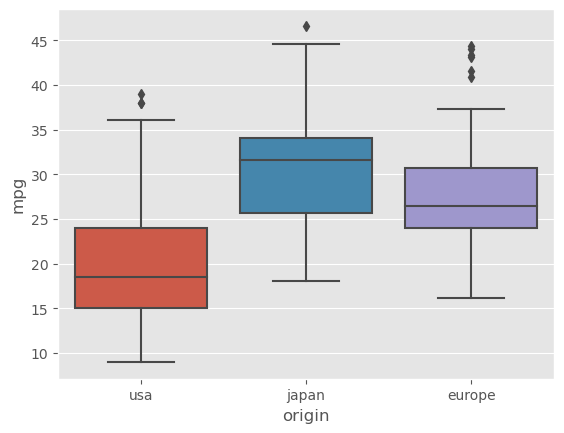

In [21]:
sns.boxplot(x = 'origin',y = 'mpg',data = df)
plt.show()

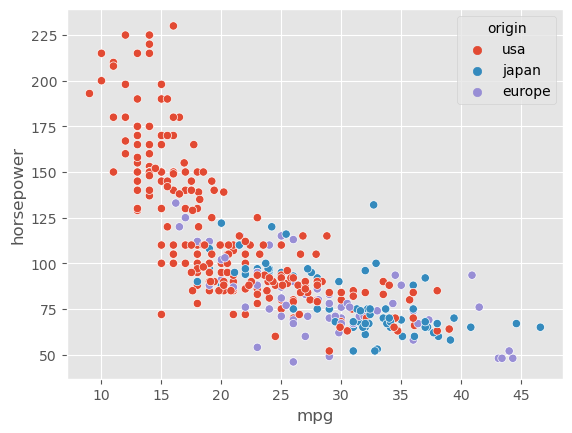

              mpg  cylinders  displacement  horsepower       weight  \
origin                                                                
europe  27.891429   4.157143    109.142857   80.928571  2423.300000   
japan   30.450633   4.101266    102.708861   79.835443  2221.227848   
usa     20.083534   6.248996    245.901606  118.638554  3361.931727   

        acceleration   model_year  
origin                             
europe     16.787143  1975.814286  
japan      16.172152  1977.443038  
usa        15.033735  1975.610442  


C:\Users\user\AppData\Local\Temp\ipykernel_10948\2999448129.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(mpg_byorigin.mean())


In [22]:
sns.scatterplot(x = df['mpg'],y = df['horsepower'],hue = df['origin'])
plt.show()

mpg_byorigin = df.groupby('origin')
print(mpg_byorigin.mean())

In [23]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

C:\Users\user\AppData\Local\Temp\ipykernel_10948\2219934722.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mpg_byear['mpg','acceleration'].mean().plot()


<Figure size 1500x400 with 0 Axes>

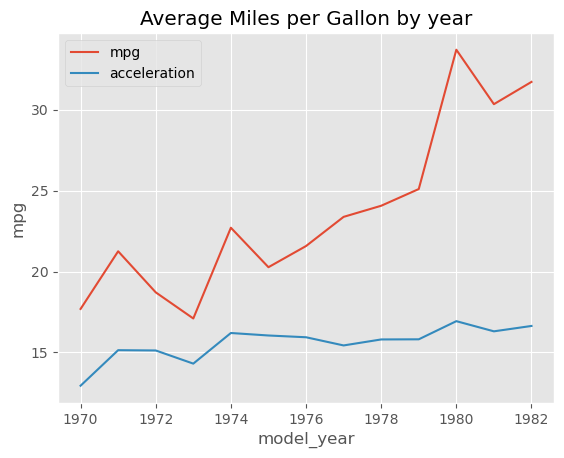

                  mpg  acceleration
model_year                         
1970        17.689655     12.948276
1971        21.250000     15.142857
1972        18.714286     15.125000
1973        17.100000     14.312500
1974        22.703704     16.203704
1975        20.266667     16.050000
1976        21.573529     15.941176
1977        23.375000     15.435714
1978        24.061111     15.805556
1979        25.093103     15.813793
1980        33.696552     16.934483
1981        30.334483     16.306897
1982        31.709677     16.638710


C:\Users\user\AppData\Local\Temp\ipykernel_10948\2219934722.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(mpg_byear['mpg','acceleration'].mean())


In [24]:
mpg_byear = df.groupby('model_year')
plt.figure(figsize = (15,4))
mpg_byear['mpg','acceleration'].mean().plot()
plt.title('Average Miles per Gallon by year')
plt.ylabel('mpg')
plt.show()
print(mpg_byear['mpg','acceleration'].mean())

In [25]:
df.set_index('name',inplace = True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970,usa
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970,usa
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970,usa
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970,usa
ford torino,17.0,8,302.0,140.0,3449,10.5,1970,usa
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982,usa
vw pickup,44.0,4,97.0,52.0,2130,24.6,1982,europe
dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982,usa


In [26]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,1976.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,1973.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,1976.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,1979.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000


In [27]:
# Top 10 most fuel efficient cars

eff_cars = df.sort_values(by = ['mpg','horsepower'],ascending = [False,False]).head(15)
eff_cars


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
mazda glc,46.6,4,86.0,65.0,2110,17.9,1980,japan
honda civic 1500 gl,44.6,4,91.0,67.0,1850,13.8,1980,japan
vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,1980,europe
vw pickup,44.0,4,97.0,52.0,2130,24.6,1982,europe
vw dasher (diesel),43.4,4,90.0,48.0,2335,23.7,1980,europe
volkswagen rabbit custom diesel,43.1,4,90.0,48.0,1985,21.5,1978,europe
vw rabbit,41.5,4,98.0,76.0,2144,14.7,1980,europe
renault lecar deluxe,40.9,4,85.0,93.5,1835,17.3,1980,europe
datsun 210,40.8,4,85.0,65.0,2110,19.2,1980,japan


In [35]:
# Linear Regression 
from sklearn.linear_model import LinearRegression

ols_sl = LinearRegression()

x_train = df['horsepower'].values.reshape(-1,1)
y_true = df['mpg']

ols_sl.fit(x_train,y_true)

print(f'slope = {ols_sl.coef_}')
print(f'intercept = {ols_sl.intercept_}')

slope = [-0.1581602]
intercept = 40.01131787111278


In [36]:
# mpg = 40.01131787111278 - 0.1581602 * horsepower

In [41]:
# Metrics
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score,mean_absolute_error

y_pred = ols_sl.predict(df['horsepower'].values.reshape(-1, 1))

ols_sl_summary = {'R2': r2_score(y_true, y_pred), 
                  'Ex. Var': explained_variance_score(y_true, y_pred), 
                  'MSE': mean_squared_error(y_true, y_pred),
                 'MAE':mean_absolute_error(y_true,y_pred),
                 }

for k, v in ols_sl_summary.items():
    print(k, ':', v)
MSE= mean_squared_error(y_true, y_pred)
RMSE = np.sqrt(MSE)
print(f'RMSE : {RMSE}')

R2 : 0.5982298596661232
Ex. Var : 0.5982298596661233
MSE : 24.482313198511783
MAE : 3.8557461120634895
RMSE : 4.947960508988706


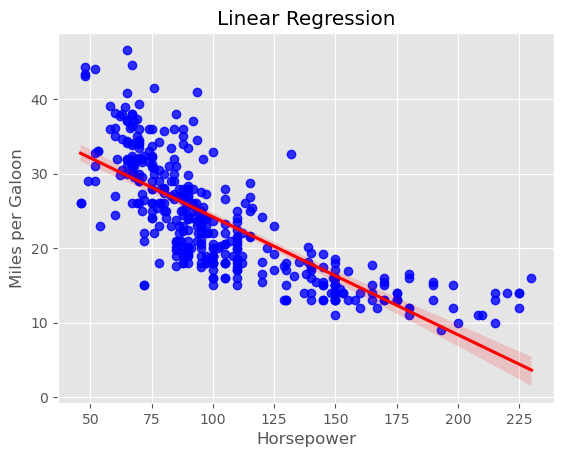

In [33]:
sns.regplot(x = 'horsepower', y = 'mpg', data=df,color = 'blue',line_kws={'color': 'red'})
plt.title('Linear Regression')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Galoon')
plt.show()

In [57]:
ols_sl.predict(np.array([20, 100, 210]).reshape(-1, 1))

array([36.84811381, 24.19529756,  6.79767521])

In [46]:
# using statsmodels
import statsmodels.api as sm

# predictor & response
x_train = df['horsepower']
y_true = df['mpg']

# ols model with intercept added to predictor
ols_sm = sm.OLS(y_true, sm.add_constant(x_train))

# fitted model and summary
ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     589.6
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           2.00e-80
Time:                        17:50:57   Log-Likelihood:                -1201.1
No. Observations:                 398   AIC:                             2406.
Df Residuals:                     396   BIC:                             2414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0113      0.723     55.307      0.000      38.589      41.434
horsepower    -0.1582      0.007    -24.282      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       19.910   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.508
Skew:                           0.537   Prob(JB):                     2.14e-05
Kurtosis:                       3.377   Cond. No.                         323.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Linear Regression 

In [55]:
df_clean = pd.get_dummies(df,columns = ['origin'],prefix = 'Origin',drop_first = True)

In [56]:
x1 = df_clean.drop('mpg', axis = 1)
y = df_clean['mpg']

In [58]:
x = sm.add_constant(x1)
lm = sm.OLS(y,x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     228.5
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          7.19e-142
Time:                        17:54:22   Log-Likelihood:                -1036.3
No. Observations:                 398   AIC:                             2091.
Df Residuals:                     389   BIC:                             2126.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1504.1338    100.964    -14.898      0.000   -1702.636   -1305.631
cylinders       -0.4228      0.319     -1.325      0.186      -1.050       0.205
displacement     0.0238      0.008      3.114      0.002       0.009       0.039
horsepower      -0.0143      0.013     -1.070      0.285      -0.041       0.012
weight          -0.0069      0.001    -10.779      0.000      -0.008      -0.006
acceleration     0.0952      0.096      0.990      0.323      -0.094       0.284
model_year       0.7833      0.051     15.355      0.000       0.683       0.884
Origin_japan     0.0522      0.559      0.093      0.926      -1.047       1.152
Origin_usa      -2.7895      0.557     -5.007      0.000      -3.885      -1.694
==============================================================================
Omnibus:                       21.265   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.277
Skew:                           0.417   Prob(JB):                     2.66e-07
Kurtosis:                       4.063   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""